## Import Modules

In [ ]:
# import nltk
# import random
# from nltk.classify.scikitlearn import SklearnClassifier
# import pickle
# from sklearn.naive_bayes import MultinomialNB, BernoulliNB
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.svm import SVC, LinearSVC, NuSVC
# from nltk.classify import ClassifierI
# from statistics import mode
# from nltk.tokenize import word_tokenize
# import re
# import os

# import csv
# import pandas as pd
# import numpy as np

In [ ]:
# import nltk.data;
# from gensim.models import word2vec;
# from sklearn.cluster import KMeans;
# from sklearn.neighbors import KDTree;
# import pandas as pd;
# import numpy as np;
# import os;
# import re;
# import logging;
# import sqlite3;
# import time;
# import sys;
# import multiprocessing;
# from wordcloud import WordCloud, ImageColorGenerator
# import matplotlib.pyplot as plt;
# from itertools import cycle;

In [ ]:
%matplotlib inline

In [ ]:
# !pip install wordcloud

In [ ]:
# from nltk.corpus.reader import WordListCorpusReader
# from nltk.corpus.reader.api import *
# nltk.download('opinion_lexicon')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# from nltk.corpus import opinion_lexicon
# from nltk.corpus import stopwords

In [ ]:
# from tqdm import tqdm
# import numpy as np
# from collections import defaultdict

In [14]:
from utility import *

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tyler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tyler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# load lexicons

In [ ]:
# #helper function 
# def txt_to_csv(txt_file,new_csv_file, header=int):
#     # use 'with' if the program isn't going to immediately terminate
#     # so you don't leave files open
#     # the 'b' is necessary on Windows
#     # it prevents \x1a, Ctrl-z, from ending the stream prematurely
#     # and also stops Python converting to / from different line terminators
#     # On other platforms, it has no effect
#     in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
#     out_csv = csv.writer(open(new_csv_file, 'w'))

#     out_csv.writerows(in_txt)
    
#     lex_csv = pd.read_csv(str(new_csv_file),header=header)
    
#     return lex_csv

In [15]:
#setup vars for VAD lexicon load
vad_text_file = r"./data/NRC-VAD-Lexicon.txt"
vad_csv_file = r"vad_lex.csv"

In [16]:
vad_lex = txt_to_csv(vad_text_file, vad_csv_file, header=0)

In [17]:
# for i in range(len(vad_lex['Word'])):
#     print(vad_lex['Word'][i])

In [18]:
# #nltk opinion lexicon
# pos_lex = opinion_lexicon.positive()
# neg_lex = opinion_lexicon.negative()

## load in pre-processed confessions

In [19]:
path = '/Users/tyler/UCSD_Wellness/analysis/data/data1.csv'
confessions=pd.read_csv(path)

In [ ]:
# confessions.head()

## Function for further pre-processing of confessions


In [ ]:
# def clean_text(all_comments, out_name):
    
#     tokenizer = nltk.data.load('tokenizers/punkt/english.pickle');
    
#     stop_words = list(set(stopwords.words('english')))
    
#     out_file = open(out_name, 'w');
    
#     for pos in range(len(all_comments)):
        
#         #Get the comment
#         val = all_comments.iloc[pos];
        
#         #Normalize tabs and remove newlines
#         no_tabs = str(val).replace('\t', ' ').replace('\n', '');
        
#         #Remove all characters except A-Z and a dot.
#         alphas_only = re.sub("[^a-zA-Z\.]", " ", no_tabs);
        
#         #Remove punctuation
#         no_punc = re.sub(r'[^(a-zA-Z)\s]','', alphas_only)
        
#         #Normalize spaces to 1
#         multi_spaces = re.sub(" +", " ", no_punc);
        
#         #Strip trailing and leading spaces
#         no_spaces = multi_spaces.strip();
        
#         #Normalize all charachters to lowercase
#         clean_text = no_spaces.lower();
        
#         #Get sentences from the tokenizer, remove the dot in each.
#         sentences = tokenizer.tokenize(clean_text);
        
#         stopped = [w for w in sentences if not w in stop_words]
        
#         sentences = [re.sub("[\.]", "", sentence) for sentence in sentences];
        
#         #If the text has more than one space (removing single word comments) and one character, write it to the file.
#         out_file.write("%s\n" % sentences)
                
                
#         #Simple logging. At every 50000th step,
#         #print the total number of rows processed and time taken so far, and flush the file.
# #         if pos % 50000 == 0:
# #             total_time = time.time() - start;
# # #             sys.stdout.write('Completed ' + str(round(100 * (pos / total_rows), 2)) + '% - ' + str(pos) + ' rows in time ' + str(round(total_time / 60, 0)) + ' min & ' + str(round(total_time % 60, 2)) + ' secs\r');
# #             out_file.flush();
# #             break;
        
#     out_file.close();

## Add date-time info to original confessions dataframe

In [20]:
confessions['timestamp']=pd.to_datetime(confessions.timestamp)
confessions['weekday']=confessions.timestamp.dt.strftime('%a')
confessions['weekday']=pd.Categorical(confessions['weekday'],categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ordered=True)

confessions.head()

,id,timestamp,content,contact,tags,note,weekday
0,14442,2019-10-12 17:05:24,I’m super excited for homecoming next weekend ...,NaN,NaN,NaN,Sat
1,14441,2019-10-12 13:22:03,"If I never met you, I would never have gotten ...",NaN,serious,NaN,Sat
2,14440,2019-10-11 17:03:50,There is an abnormal amount of hot girls that ...,NaN,NaN,NaN,Fri
3,14439,2019-10-11 15:58:00,"Just out of curiosity, on a scale of one to te...",NaN,NaN,NaN,Fri
4,14438,2019-10-10 19:10:20,To the person who was playing the trumpet outs...,NaN,wholesome,NaN,Thu


In [21]:
start = time.time();
clean_text(confessions['content'], './data/extra_clean_comments.txt')
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 0.8125731945037842 secs


In [22]:
extra_clean_txt_file = r"./data/extra_clean_comments.txt"
extra_clean_csv_file = r"extra_clean_comments.csv"

In [23]:
clean_confessions = txt_to_csv(extra_clean_txt_file, extra_clean_csv_file, header=None)
# print(clean_comments)
clean_content = clean_confessions[0].tolist()
# len(clean_content)

## Construct Various Sentiment Scoring Dictionaries

### nltk opinion positive/negative lexicon

#### This takes a long time to compute, so saved & loaded as a pkl file.

In [ ]:
# def compute_pos_neg_scores(clean_content): 
#     #nltk opinion lexicon
#     pos_lex = opinion_lexicon.positive()
#     neg_lex = opinion_lexicon.negative()
#     pn_lex_score = defaultdict(int)
    
#     for i,note in tqdm(enumerate(clean_content)):
#         pn_lex_score[i] = np.array([0.,0.])
#         note = re.sub("[^\w]", " ",  note).split()
#         for word in note:
#             if word in pos_lex:
#                 pn_lex_score[i] += np.array([1.,0.])
#             elif word in neg_lex:
#                 pn_lex_score[i] += np.array([0.,1.])
                
#     output = open('pn_lex_score.pkl', 'wb')
#     pickle.dump(pn_lex_score, output)
#     output.close()
#     return None

In [ ]:
# output = open('pn_lex_score.pkl', 'wb')
# pickle.dump(pn_lex_score, output)
# output.close()

In [ ]:
# compute_pos_neg_scores(clean_content)

In [28]:
pkl_file = open('pn_lex_score.pkl', 'rb')
pn_lex_score = pickle.load(pkl_file)
pkl_file.close()

In [29]:
temp = pd.DataFrame.from_dict(pn_lex_score, orient='index', columns=['#POS', '#NEG'])
new_1 = pd.concat([confessions,temp],axis=1)

### NRC VAD Lexicon

In [ ]:
# def compute_VAD_scores(clean_content):
#     #NRC VAD lexicon
#     all_VAD_scores = defaultdict(int)
#     # clean_content = clean_comments[0].tolist()
#     for i,note in tqdm(enumerate(clean_content)):
#         all_VAD_scores[i] = np.array([0.,0.,0.])
#         note = re.sub("[^\w]", " ",  note).split()
#         for word in note:
#             if word in list(vad_lex['Word']):
#                 all_VAD_scores[i] += np.array([vad_lex['Valence'][i],vad_lex['Arousal'][i],vad_lex['Dominance'][i]])
    
#     output = open('all_VAD_scores.pkl', 'wb')
#     pickle.dump(all_VAD_scores, output)
#     output.close()
#     return None

In [ ]:
# output = open('all_VAD_scores.pkl', 'wb')
# pickle.dump(all_VAD_scores, output)
# output.close()

In [ ]:
# compute_VAD_scores(clean_content, vad_lex)

In [30]:
import pickle
import pandas as pd
pkl_file = open('all_VAD_scores.pkl', 'rb')
all_VAD_scores = pickle.load(pkl_file)
pkl_file.close()

In [31]:
# all_VAD_scores

In [32]:
# test = confessions

In [33]:
temp_VAD = pd.DataFrame.from_dict(all_VAD_scores, orient='index', columns=['Valence','Arousal','Dominance'])

In [38]:
new = pd.concat([new_1,temp_VAD],axis=1)

In [39]:
type(new)

pandas.core.frame.DataFrame

# Graphing VAD frequency across weekday

In [35]:
# def compute_vad_weekday_scores(new): 
#     # calculate total scores and counts
#     weekday_valence_sum=new.groupby('weekday')['Valence'].sum()
#     weekday_valence_count=new.groupby('weekday')['Valence'].count()
#     valence= weekday_valence_sum/weekday_valence_count


#     weekday_arousal_sum=new.groupby('weekday')['Arousal'].sum()
#     weekday_arousal_count=new.groupby('weekday')['Arousal'].count()
#     arousal = weekday_arousal_sum/weekday_arousal_count


#     weekday_dominance_sum=new.groupby('weekday')['Dominance'].sum()
#     weekday_dominance_count=new.groupby('weekday')['Dominance'].count()
#     dominance = weekday_dominance_sum/weekday_dominance_count

#     return valence, arousal, dominance


In [40]:
# def plot_vad_weekday_scores(new): 
#     # calculate total scores and counts
#     weekday_valence_sum=new.groupby('weekday')['Valence'].sum()
#     weekday_valence_count=new.groupby('weekday')['Valence'].count()
#     valence= weekday_valence_sum/weekday_valence_count


#     weekday_arousal_sum=new.groupby('weekday')['Arousal'].sum()
#     weekday_arousal_count=new.groupby('weekday')['Arousal'].count()
#     arousal = weekday_arousal_sum/weekday_arousal_count


#     weekday_dominance_sum=new.groupby('weekday')['Dominance'].sum()
#     weekday_dominance_count=new.groupby('weekday')['Dominance'].count()
#     dominance = weekday_dominance_sum/weekday_dominance_count
    
#     fig, ax = plt.subplots()
#     index = np.arange(7)
#     bar_width =0.5
#     w = 0.35
    
#     ax.bar(index-w, valence.values-10, width=w, color='b', align='center',label="Valence")
#     ax.bar(index, arousal.values-10, width=w, color='g', align='center', label="Arousal")
#     ax.bar(index+w, dominance.values-10, width=w, color='r', align='center', label="Dominance")

#     ax.grid(False)
#     plt.ylabel("VAD Scores (normalized)")
#     plt.xlabel("Day of the Week")
#     plt.xticks(index,list(weekday_valence_sum.index))
#     plt.legend()
#     plt.title('Valence, Arousal, and Dominance over typical Week ')
#     fig.savefig("weekday.png")
#     plt.show()

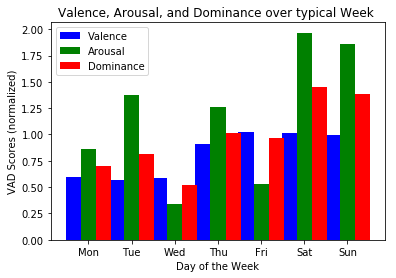

In [42]:
from utility import *
plot_vad_weekday_scores(new)

# NLTK Polarity Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# # next, we initialize VADER so we can use it within our Python script
# sid = SentimentIntensityAnalyzer()

# # the variable 'message_text' now contains the text we will analyze.
# message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''

# print(message_text)

# # Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
# scores = sid.polarity_scores(message_text)

# # Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen

# for key in sorted(scores):
#         print('{0}: {1}, '.format(key, scores[key]), end='')

In [ ]:
# def compute_nltk_vader_scores(clean_content)   
#     # next, we initialize VADER so we can use it within our Python script
#     sid = SentimentIntensityAnalyzer()

#     all_nltk_vader_scores = defaultdict(int)
#     # clean_content = clean_comments[0].tolist()
#     for i,note in tqdm(enumerate(clean_content)):
#         scores = sid.polarity_scores(note)
#         all_nltk_vader_scores[i] = np.array([scores['neg'],scores['neu'],scores['pos'],scores['compound']])

#     output = open('all_nltk_vader_scores.pkl', 'wb')
#     pickle.dump(all_nltk_vader_scores, output)
#     output.close()
#     return None

In [ ]:
# output = open('all_nltk_vader_scores.pkl', 'wb')
# pickle.dump(all_nltk_vader_scores, output)
# output.close()

In [ ]:
pkl_file = open('all_nltk_vader_scores.pkl', 'rb')
all_nltk_vader_scores = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
nltk_vader = pd.DataFrame.from_dict(all_nltk_vader_scores, orient='index', columns=['neg','neu','pos','compound'])
nltk_vader.head()
df = pd.concat([new,nltk_vader],axis=1)

In [ ]:
df['hour']=confessions.timestamp.dt.strftime('%H')
df.head()

In [ ]:
df.to_csv(r'/Users/tyler/UCSD_Wellness/analysis/df_FULL_metrics.csv',index=False)

## Graph Polarity Scores

In [ ]:
hour_neg_sum=df.groupby('hour')['neg'].sum()
hour_neg_count=df.groupby('hour')['neg'].count()
neg = hour_neg_sum/hour_neg_count

hour_pos_sum=df.groupby('hour')['pos'].sum()
hour_pos_count=df.groupby('hour')['pos'].count()
pos = hour_pos_sum/hour_pos_count

hour_neu_sum=df.groupby('hour')['neu'].sum()
hour_neu_count=df.groupby('hour')['neu'].count()
neu = hour_neu_sum/hour_neu_count

hour_compound_sum=df.groupby('hour')['compound'].sum()
hour_compound_count=df.groupby('hour')['compound'].count()
compound = hour_compound_sum/hour_compound_count




In [ ]:
def plot_nltk_vader_scores(df):
    
    hour_neg_sum=df.groupby('hour')['neg'].sum()
    hour_neg_count=df.groupby('hour')['neg'].count()
    neg = hour_neg_sum/hour_neg_count

    hour_pos_sum=df.groupby('hour')['pos'].sum()
    hour_pos_count=df.groupby('hour')['pos'].count()
    pos = hour_pos_sum/hour_pos_count

    hour_neu_sum=df.groupby('hour')['neu'].sum()
    hour_neu_count=df.groupby('hour')['neu'].count()
    neu = hour_neu_sum/hour_neu_count

    hour_compound_sum=df.groupby('hour')['compound'].sum()
    hour_compound_count=df.groupby('hour')['compound'].count()
    compound = hour_compound_sum/hour_compound_count
    fig, ax = plt.subplots()
    index = np.arange(24)
    bar_width =0.5
    w = 0.34
    ax.bar(index+w, neg.values, width=w, color='r', align='center',label='negative')
    # ax.bar(index-(w/2), neu.values, width=w, color='y', align='center')
    ax.bar(index, compound.values, width=w, color='g', align='center',label='compound')
    ax.bar(index-w, pos.values, width=w, color='b', align='center',label='positive')

    # ax.bar(list(weekday_distri.index))
    ax.grid(False)
    # ax.set_xticklabels(np.arange(24))
    plt.ylabel("VAD Polarity Scores (normalized)")
    plt.xlabel("Hour of the day")
    plt.xticks(np.arange(0,25, step=4))

    # ax.grid(False)
    # plt.xticks(index,list(compound.index))

    plt.title('Polarity of Confessions Over 24 Hours')
    plt.legend(loc=1, prop={'size':12 })
    # plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
    fig.savefig("weekday_nltk_vader.png")
    plt.show()

In [ ]:
plot_nltk_vader_scores()

## Filter DataFrame for detailed analysis

### Compute statistics

In [ ]:
avg_valence = df[['Valence']].mean(axis=0)
avg_arousal = df[['Arousal']].mean(axis=0)
avg_dominance = df[['Dominance']].mean(axis=0)
print(avg_valence,avg_arousal,avg_dominance)

avg_compound = df[['compound']].mean(axis=0)
avg_pos = df[['pos']].mean(axis=0)

In [ ]:
# df_neg = df[df['Dominance'] > avg_dominance[0]/2]
df_FULL_neg = df[df['compound'] < 0]
# df_neg= df_neg[df_neg['Valence'] < avg_valence[0]]
# df_neg = df_neg[df_neg['#NEG'] > 0]

In [ ]:
df_FULL_pos = df[df['compound'] > 0.5]

In [ ]:
df_FULL_pos.to_csv(r'/Users/tyler/UCSD_Wellness/analysis/df_FULL_pos_filters.csv',index=False)

In [ ]:
# test = pd.read_csv('df_neg_filters.csv')
# test.head()

In [ ]:
df_pos_by_compound = df[df['pos'] > avg_pos[0] ]
df_pos= df_pos_by_compound[df_pos_by_compound['Valence'] > avg_valence[0]]
df_pos = df_pos[df_pos['#POS'] > 3]

In [ ]:
len(df_pos)

In [ ]:
df_pos.to_csv(r'/Users/tyler/UCSD_Wellness/analysis/df_pos_filters.csv',index=False)

# Train Word2Vec Model

In [50]:
from gensim.models.word2vec import LineSentence
from nltk.corpus import subjectivity
nltk.download('vader_lexicon')
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
def train_word2vec(csv_filename_string, num_f, min_wc, ctxt,ds):   
    
    start = time.time();
    #Set the logging format to get some basic updates.
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
        level=logging.INFO)
    # Set values for various parameters
    num_features = num_f;    # Dimensionality of the hidden layer representation
    min_word_count = min_wc;   # Minimum word count to keep a word in the vocabulary
    num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
    context = ctxt       # Context window size (on each side)                                                       
    downsampling = ds   # Downsample setting for frequent words
    # Initialize and train the model. 
    #The LineSentence object allows us to pass in a file name directly as input to Word2Vec,
    #instead of having to read it into memory first.
    print("Training model...");
    model = word2vec.Word2Vec(LineSentence(csv_filename_string), workers=num_workers, \
                size=num_features, min_count = min_word_count, \
                window = context, sample = downsampling);
    # We don't plan on training the model any further, so calling 
    # init_sims will make the model more memory efficient by normalizing the vectors in-place.
    model.init_sims(replace=True);
    # Save the model
    model_name = "model_"+str(csv_filename_string);
    model.save(model_name);
    print('Total time: ' + str((time.time() - start)) + ' secs')
    return model

In [52]:
num_features = 100    # Dimensionality of the hidden layer representation
min_word_count = 35
context = 8
downsampling = 1e-3
model = train_word2vec('extra_clean_comments.csv', num_features,min_word_count,context,downsampling)

2019-12-06 15:36:55,391 : INFO : collecting all words and their counts
2019-12-06 15:36:55,392 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-06 15:36:55,573 : INFO : collected 22487 word types from a corpus of 562667 raw words and 8215 sentences
2019-12-06 15:36:55,574 : INFO : Loading a fresh vocabulary
2019-12-06 15:36:55,585 : INFO : effective_min_count=35 retains 1341 unique words (5% of original 22487, drops 21146)
2019-12-06 15:36:55,586 : INFO : effective_min_count=35 leaves 485939 word corpus (86% of original 562667, drops 76728)
2019-12-06 15:36:55,590 : INFO : deleting the raw counts dictionary of 22487 items
2019-12-06 15:36:55,592 : INFO : sample=0.001 downsamples 70 most-common words


Training model...


2019-12-06 15:36:55,592 : INFO : downsampling leaves estimated 323394 word corpus (66.6% of prior 485939)
2019-12-06 15:36:55,595 : INFO : estimated required memory for 1341 words and 100 dimensions: 1743300 bytes
2019-12-06 15:36:55,596 : INFO : resetting layer weights
2019-12-06 15:36:55,619 : INFO : training model with 8 workers on 1341 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=8
2019-12-06 15:36:55,921 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-06 15:36:55,922 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-06 15:36:55,922 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-06 15:36:55,923 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-06 15:36:55,924 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 15:36:55,925 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 15:36:55,925 : INFO : w

Total time: 1.9228191375732422 secs


In [53]:
Z = model.wv.syn0;
print(Z[0].shape)
Z[0]

(100,)


/Users/tyler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


array([-0.12106933, -0.03347975, -0.14837995, -0.06364352,  0.16307262,
       -0.02011654, -0.05920289,  0.06699333, -0.10713728,  0.02049798,
        0.13423522,  0.01571414, -0.047854  , -0.1529832 ,  0.10560788,
       -0.0114307 , -0.00810273,  0.06048943,  0.06468853,  0.05156519,
       -0.0328604 , -0.10021412,  0.08107006, -0.14669292, -0.10169958,
       -0.05087617, -0.01787493, -0.0625774 ,  0.02453608, -0.04903829,
       -0.12037465,  0.02927306, -0.10858527,  0.03217845, -0.00402699,
       -0.14156614, -0.04277106, -0.06978119, -0.16017197, -0.10985563,
       -0.01397812, -0.18825729,  0.07511324, -0.14373744,  0.05219794,
        0.07205795,  0.00218111,  0.10772806, -0.01114591,  0.0920764 ,
       -0.0221346 , -0.0617753 , -0.20395216, -0.1032783 , -0.24772748,
       -0.04636723, -0.09510434, -0.18396294,  0.00306312,  0.288231  ,
        0.18890938, -0.04122413, -0.05593376, -0.03058082, -0.16454609,
        0.04911413, -0.05330642, -0.02659083, -0.09414594, -0.05

# Cluster, Generate Word Clouds

In [54]:
# def clustering_on_wordvecs(word_vectors, num_clusters):
#     print(type(word_vectors))
#     print(type(num_clusters))
#     # Initalize a k-means object and use it to extract centroids
#     kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
#     idx = kmeans_clustering.fit_predict(word_vectors);
    
#     return kmeans_clustering.cluster_centers_, idx;

In [60]:
# def get_top_words(index2word, k, centers, wordvecs):
#     print(type(index2word))
#     print(type(k))
#     print(type(centers))
#     print(type(wordvecs))
#     tree = KDTree(wordvecs);
# #Closest points for each Cluster center is used to query the closest 20 points to it.
#     closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
#     closest_words_idxs = [x[1] for x in closest_points];
# #Word Index is queried for each position in the above array, and added to a Dictionary.
#     closest_words = {};
#     for i in range(0, len(closest_words_idxs)):
#         closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
# #A DataFrame is generated from the dictionary.
#     print(closest_words['Cluster #0'])
#     df = pd.DataFrame(closest_words);
#     df.index = df.index+1
#     return df;

In [63]:
def display_cloud(cluster_num, cmap, label=None):
    print(cluster_num)
    print(type(cluster_num))
    print(type(cmap))
    wc = WordCloud(background_color="white", max_words=200, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(label+ '_cluster_' + str(cluster_num), bbox_inches='tight')

In [64]:
centers, clusters = clustering_on_wordvecs(Z, 1);
centroid_map = dict(zip(model.wv.index2word, clusters));
top_words = get_top_words(model.wv.index2word, 30, centers, Z);


# temp = list(top_words['Cluster #0']).remove('sometimes')
# print(temp)

<class 'numpy.ndarray'>
<class 'int'>
<class 'list'>
<class 'int'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
["mind']", 'instagram', 'legit', 'lesbian', 'offer', 'note', 'killing', 'pressure', 'freaking', "friends']", 'pictures', 'death', 'photos', 'brain', 'opportunity', 'voice', "['honestly", "now']", 'rush', 'triton', 'speaking', "shit']", 'poor', 'power', 'mess', "here']", 'apparently', 'hearing', "['in", 'drive']


/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:276: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:276: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:276: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:625: RuntimeWarning: invalid value encountered in multiply
  inertia = (mindist * sample_weight).sum()
/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:276: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:276: RuntimeWarning: in

In [65]:
# 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
#             'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
#             'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'

rainbow
0
<class 'int'>
<class 'str'>


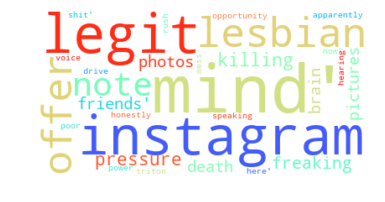

In [66]:
cmaps = 'rainbow'
for i in range(1):
    col = cmaps;
    print(col)
    display_cloud(i, col, label='total')

# Analyze Word Similarities

In [72]:
def get_word_table(table, key, sim_key='similarity', show_sim = True):

    if show_sim == True:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]

In [73]:
keys = ['stressed','sad','relationship','school' ];
tables = [];
for key in keys:
    tables.append(get_word_table(model.wv.similar_by_word(key), key, show_sim=False))
    
similarity_table = pd.concat(tables, axis=1)


In [71]:
similarity_table

,stressed,sad,relationship,school
0,anxious,insecure,boyfriend,high
1,broken,awkward,feelings,classes
2,accepted,bad,feeling,college
3,potential,feeling,lost,gpa
4,now'],happy,fwb,year
5,struggling,scared,now,quarter
6,negative,guilty,sex,depression
7,guilty,nervous,having,years
8,confused,worried,realized,past
9,friendships,depressed,distance,anxiety


In [ ]:
similarity_table.to_csv(r'/Users/tyler/UCSD_Wellness/analysis/Final_total_similarity_sample.csv',index=False)

In [76]:

def compute_similarity_scores(confession, tags):
    """""
     
     :param confession: message to compute similarities to tags
     :type confession: str
     :param tags: keywords for comparison
     :type tags: list of str
     :returns: dictionary of array len(tags)
     """
    assert isinstance(confession, str)
    assert isinstance(tags, list)
    similarity_scores = {}
    words = confession.split()

    for i, word in enumerate(words):
    #         print(word)
    #         if str(word) not in model.wv.vocab:
    #             words = words.remove(word)
    #             print(confession)

        try:
            sim = [model.wv.similarity(str(word),tag) for tag in tags]
            similarity_scores[i] = sim
        except:
#             print('Error')
            similarity_scores[i] = list([0,0,0,0])
    
    return similarity_scores

        
    
#create dict for similarity scores of each word in the confession to each top_10 words for the tags

In [77]:
def generate_tag_suggestions(scores, tags):
    """""
     
     :param scores: similarities to  tags
     :type scores: dictionary
     :param tags: keywords for comparison
     :type tags: list of str
     :returns: dictionary of array len(tags)
     """
    assert isinstance(scores,dict)
    assert isinstance(tags,list)
    
    results = []
    for key, value in similarity_scores.items():
        for i, sim in enumerate(value):
             if sim > 0.75:
                results.append(tags[i])
                
    return results
        

# Proof of Concept: Auto-Tag Suggestion

### computes similarities of all words in the confession to every tag, thresholds to select candidates

In [80]:
## Define tags, load in new confession to be tagged.
tags = ['stressed','sad','relationship','school' ]
confession = "I am having a really rough day, my girl just dumped with me, AND I failed an exam."

In [81]:
similarity_scores = compute_similarity_scores(confession, tags)
suggest_tags = generate_tag_suggestions(similarity_scores, tags)
print(suggest_tags)

['sad']
